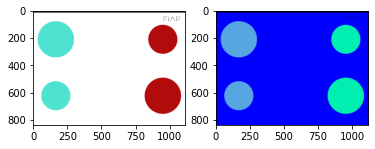

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)
plt.show()

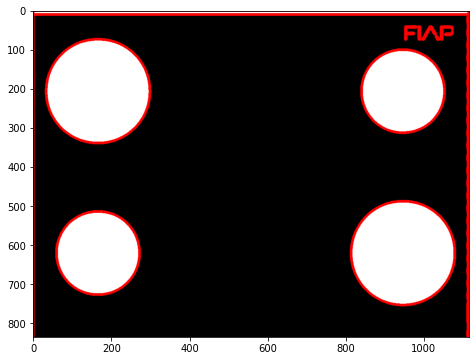

In [4]:
#Implemente seu código

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png',0)


image_lower = np.array([0])  
image_upper = np.array([254]) 

mask_hsv = cv2.inRange(img, image_lower, image_upper)


contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img)

35536.0
55409.0
55409.0
55424.5


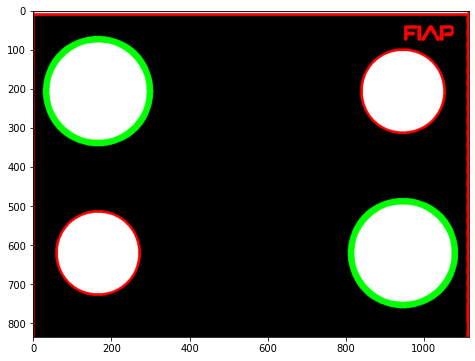

In [5]:
## Implemente seu código

maior = None
maior_area = 0
for c in contornos:
    area = cv2.contourArea(c)
    if area > maior_area:        
        print(area)
        maior_area = area
        maior = c
        if area == 55409.0:        
            print(area)
            maior_area = area
            maior2 = c
        
cv2.drawContours(contornos_img, [maior], -1, [0, 255, 0], 15)
cv2.drawContours(contornos_img, [maior2], -1, [0, 255, 0], 15)

plt.figure(figsize=(8,6))
plt.imshow(contornos_img)


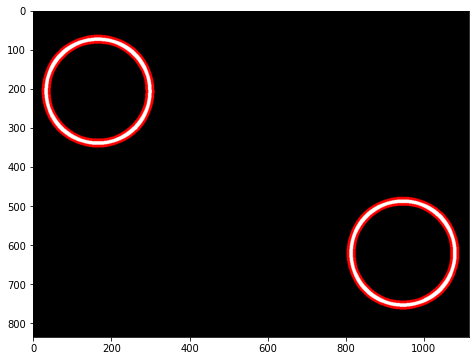

In [6]:
img_rgb = cv2.cvtColor(contornos_img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(contornos_img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([50, 50, 100])  
image_upper_hsv = np.array([70, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

In [7]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]

M = cv2.moments(cnt)

print( M )

{'m00': 62321.0, 'm10': 58938614.166666664, 'm01': 38648372.33333333, 'm20': 56049072225.0, 'm11': 36550759987.58333, 'm02': 24276685410.166664, 'm30': 53592052650168.16, 'm21': 34758772838286.95, 'm12': 22959073253038.715, 'm03': 15438324736619.102, 'mu20': 309269592.06407166, 'mu11': -25544.163719177246, 'mu02': 308894713.3555565, 'mu30': -2749924.9296875, 'mu21': -14748793.997558594, 'mu12': 2953225.518432617, 'mu03': 14495473.263671875, 'nu20': 0.07962847431704831, 'nu11': -6.576924588957287e-06, 'nu02': 0.07953195328692121, 'nu30': -2.8361866254238846e-06, 'nu21': -1.5211445165436327e-05, 'nu12': 3.0458644986323098e-06, 'nu03': 1.4950178077874879e-05}


In [8]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = cx - 780
cy2 = cy - 420

print("centro de massa na possição: ",cx, cy)
print("centro de massa na possição: ",cx2, cy2)

centro de massa na possição:  945 620
centro de massa na possição:  165 200


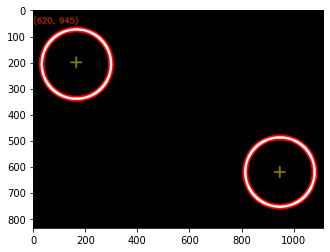

In [9]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

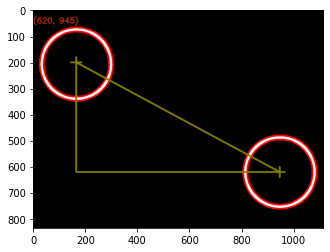

In [10]:


## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

pt1 = cv2.line(contornos_img,(cx2,cy2),(cx,cy),color,5)
cv2.line(contornos_img,(cx2,cy2),(cx2,cy),color,5)
pt2 = cv2.line(contornos_img,(cx2,cy),(cx,cy),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

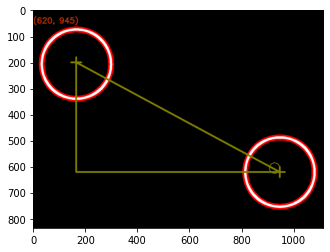

In [11]:

## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

pt1 = cv2.line(contornos_img,(cx2,cy2),(cx,cy),color,5)
cv2.line(contornos_img,(cx2,cy2),(cx2,cy),color,5)
pt2 = cv2.line(contornos_img,(cx2,cy),(cx,cy),color,5)


# Center coordinates
center_coordinates = (cx - 20, cy - 15)
 
# Radius of circle
radius = 20
  
# Blue color in BGR
color = (128,128,0)
  
# Line thickness of 2 px
thickness = 2

image = cv2.circle(contornos_img, center_coordinates, radius, color, thickness)
  
# Para escrever vamos definir uma fonte 

plt.imshow(contornos_img);

O valor do ângulo é de:  -45.00000000000001


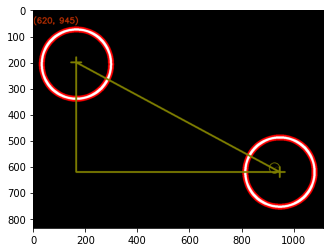

In [12]:
import math

def angle(pt1, pt2):
    x1, y1 = pt1
    x2, y2 = pt2
    inner_product = x1*x2 + y1*y2
    len1 = math.hypot(x1, y1)
    len2 = math.hypot(x2, y2)
    return math.acos(inner_product/(len1*len2))

def calculate(pt, ls):
    i = 2
    for x in ls:
        pt2 = (x, i)
        i += 1
        ang = math.degrees(angle(pt, pt2))
        ang = ang * (-1)
        print('O valor do ângulo é de: ', ang)

pt = (3, 1)
ls = [1]

calculate(pt, ls)

## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

pt1 = cv2.line(contornos_img,(cx2,cy2),(cx,cy),color,5)
cv2.line(contornos_img,(cx2,cy2),(cx2,cy),color,5)
pt2 = cv2.line(contornos_img,(cx2,cy),(cx,cy),color,5)


# Center coordinates
center_coordinates = (cx - 10, cy - 10)
 
# Radius of circle
radius = 10
  
# Blue color in BGR
color = (128,128,0)
  
# Line thickness of 2 px
thickness = 1

image = cv2.circle(contornos_img, center_coordinates, radius, color, thickness)
  
# Para escrever vamos definir uma fonte 

plt.imshow(contornos_img);